In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from pylab import *
import scipy
from scipy.fftpack import fft,fftfreq, fftshift

In [2]:
df=pd.read_csv("ciccese.csv",header=int(0))

In [3]:
from datetime import datetime
df['date']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'anio'],x[u'mes'], x[u'dia'], x[u'hora(utc)']), "%Y %m %d %H"),axis=1)

In [4]:
df.head()

,anio,mes,dia,hora(utc),altura(mm),date
0,2016,1,1,0,253,2016-01-01 00:00:00
1,2016,1,1,1,221,2016-01-01 01:00:00
2,2016,1,1,2,223,2016-01-01 02:00:00
3,2016,1,1,3,265,2016-01-01 03:00:00
4,2016,1,1,4,342,2016-01-01 04:00:00


In [5]:
df.describe()

,anio,mes,dia,hora(utc),altura(mm)
count,1440.0,1440.000000,1440.000000,1440.000000,1440.000000
mean,2016.0,1.483333,15.516667,11.500000,471.790278
std,0.0,0.499896,8.687278,6.924591,292.736442
min,2016.0,1.000000,1.000000,0.000000,-274.000000
25%,2016.0,1.000000,8.000000,5.750000,294.500000
50%,2016.0,1.000000,15.500000,11.500000,484.500000
75%,2016.0,2.000000,23.000000,17.250000,678.000000
max,2016.0,2.000000,31.000000,23.000000,1214.000000


In [6]:
df.apply(lambda x: sum(x.isnull()), axis=0)

anio          0
mes           0
dia           0
hora(utc)     0
altura(mm)    0
date          0
dtype: int64

In [7]:
df.columns

Index(['anio', 'mes', 'dia', 'hora(utc)', 'altura(mm)', 'date'], dtype='object')

In [8]:
df.columns=['anio','mes','dia','hora(utc)','altura(mm)','date']

In [9]:
df.tail()

,anio,mes,dia,hora(utc),altura(mm),date
1435,2016,2,29,19,414,2016-02-29 19:00:00
1436,2016,2,29,20,383,2016-02-29 20:00:00
1437,2016,2,29,21,339,2016-02-29 21:00:00
1438,2016,2,29,22,305,2016-02-29 22:00:00
1439,2016,2,29,23,291,2016-02-29 23:00:00


In [10]:
df.describe()

,anio,mes,dia,hora(utc),altura(mm)
count,1440.0,1440.000000,1440.000000,1440.000000,1440.000000
mean,2016.0,1.483333,15.516667,11.500000,471.790278
std,0.0,0.499896,8.687278,6.924591,292.736442
min,2016.0,1.000000,1.000000,0.000000,-274.000000
25%,2016.0,1.000000,8.000000,5.750000,294.500000
50%,2016.0,1.000000,15.500000,11.500000,484.500000
75%,2016.0,2.000000,23.000000,17.250000,678.000000
max,2016.0,2.000000,31.000000,23.000000,1214.000000


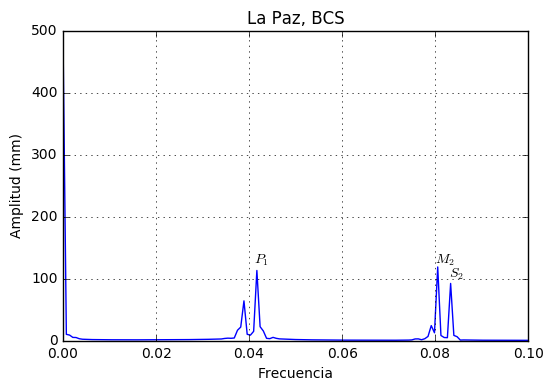

In [11]:
N = 1440
T = 1
y = df['altura(mm)']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.xlim(0,.1)
plt.title('La Paz, BCS')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud (mm)')
plt.text(0.08,125,'$M_{2}$')
plt.text(0.083,102,'$S_{2}$')
plt.text(0.041,125,'$P_{1}$')
plt.grid()
plt.show()

In [12]:
a= yf.real[0:30,]/1440 

In [13]:
a[a[:,] > 10]

array([ 471.79027778])

In [14]:
yf/1440

array([ 471.79027778+0.j        ,    1.12985391-9.8608946j ,
         -3.45653695-8.04288996j, ...,    1.06579576+4.88561728j,
         -3.45653695+8.04288996j,    1.12985391+9.8608946j ])

In [15]:
b= np.absolute(yf/1440)

In [16]:
b[b[:,] > 10]

array([ 471.79027778,   16.55341867,   21.66066513,   63.91865375,
         10.03781637,   14.76887262,  112.93183969,   22.27997147,
         15.35317457,   24.01832666,   12.4444684 ,  118.63969173,
         92.03258859,   92.03258859,  118.63969173,   12.4444684 ,
         24.01832666,   15.35317457,   22.27997147,  112.93183969,
         14.76887262,   10.03781637,   63.91865375,   21.66066513,
         16.55341867])